In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## đọc dữ liệu

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/nam3/course/nlp/keras-text-summarization/demo/data/data_train.csv', encoding='utf-8')
df_dev = pd.read_csv('/content/drive/MyDrive/nam3/course/nlp/keras-text-summarization/demo/data/data_val.csv', encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/nam3/course/nlp/keras-text-summarization/demo/data/test_data.csv', encoding='utf-8')


In [ ]:
#so sanh
set_test = pd.read_csv('/content/drive/MyDrive/nam3/course/nlp/keras-text-summarization/demo/data/test_data.csv', encoding='utf-8')

In [ ]:
set_test = set_test.drop(['Unnamed: 0', 'file'], axis=1)

In [ ]:
df_train = df_train.drop(['Unnamed: 0', 'file'], axis=1)
df_dev = df_dev.drop(['Unnamed: 0', 'file'], axis=1)
df_test = df_test.drop(['Unnamed: 0', 'file'], axis=1)

In [ ]:
df_train = df_train[0:50000]
df_dev = df_dev[0:10000]
# data_20k = train_df[0:20000]
# df_test = df_test[0:10000]

In [ ]:
df_test.head(2)

,original,summary
0,HMS Queen_Elizabeth thử_nghiệm trên biển hồi n...,Bộ_trưởng Quốc_phòng Anh vạch ra chiến_lược hậ...
1,Bộ_trưởng Công_Thương_Trần_Tuấn_Anh vừa kỷ_luậ...,Nhận kỷ_luật sau khi đi lễ trong giờ_hành_chín...


In [ ]:
df_train['summary'][1]

'USS Michigan , tàu_ngầm hạt_nhân Mỹ tới cảng Busan của Hàn_Quốc giữa khi căng_thẳng leo_thang trên bán_đảo Triều_Tiên . Động_thái này được cho là nhằm gia_tăng áp_lực lên Bình_Nhưỡng . '

In [ ]:
#Add sostok and eostok at 
# post_pre_train = df_train
# post_pre_dev = df_dev
# post_pre_test = df_test
df_train['summary'] = df_train['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df_dev['summary'] = df_dev['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df_test['summary'] = df_test['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

##load word embedding Word2vec 100dims

In [ ]:
EMBEDDING = '/content/drive/MyDrive/nam3/course/nlp/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
  values = line.split(' ')
  word = values[0]
  word_dict.append(word)
  try:
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  except Exception as e:
    pass
f.close()
print('Embedding data loaded')

Embedding data loaded


In [ ]:
# words = word_dict
# num_words = len(words)
# # Dictionary word:index pair
# # word is key and its value is corresponding index
# word_to_index = {w : i + 2 for i, w in enumerate(words)}
# word_to_index["UNK"] = 1
# word_to_index["PAD"] = 0
# # Dictionary lable:index pair
# idx2word = {i: w for w, i in word_to_index.items()}

In [ ]:
# import numpy as np
# embedding_matrix = np.zeros((num_words, embedding_dim))
# # for each word in out tokenizer lets try to find that work in our w2v model
# word_to_index

# for word, i in word_to_index.items():
#   if i > max_feature:
#     continue
#   embedding_vector = embeddings_index.get(word)
#   if embedding_vector is not None:
#   # add that words vector to the matrix
#     embedding_matrix[i] = embedding_vector
#   else:
#     # doesn't exist, assign a random vector
#     embedding_matrix[i] = np.random.randn(embedding_dim)
  

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 3.8 MB/s 
     |████████████████████████████████| 743 kB 40.3 MB/s 


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(df_train.original.values.flatten())
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encodingx(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

    return X

In [ ]:
word_to_index['tôi']

85

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

yword_tokenizer = Tokenizer(oov_token=-1)
yword_tokenizer.fit_on_texts(df_train.summary.values.flatten())
yword_to_index = yword_tokenizer.word_index
yword_to_index['pad'] = 0
yword_to_index['unk'] = -1

yindex_to_word = {i: w for w, i in yword_to_index.items()}

def encodingy(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = yword_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = yword_to_index['pad'])

    return X

In [ ]:
import numpy as np
num_words = len(word_to_index)
embedding_matrixX = np.zeros((num_words, embedding_dim))
# for each word in out tokenizer lets try to find that work in our w2v model

for word, i in word_to_index.items():
  if i > max_feature:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
  # add that words vector to the matrix
    embedding_matrixX[i] = embedding_vector
  else:
    # doesn't exist, assign a random vector
    embedding_matrixX[i] = np.random.randn(embedding_dim)
  

In [ ]:
import numpy as np
num_words = len(yword_to_index)
embedding_matrixy = np.zeros((num_words, embedding_dim))
# for each word in out tokenizer lets try to find that work in our w2v model


for word, i in yword_to_index.items():
  if i > max_feature:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
  # add that words vector to the matrix
    embedding_matrixy[i] = embedding_vector
  else:
    # doesn't exist, assign a random vector
    embedding_matrixy[i] = np.random.randn(embedding_dim)
  

In [ ]:


X_train_encoded = encodingx(df_train.original.values.flatten())
y_train_encoded = encodingy(df_train.summary)
X_dev_encoded = encodingx(df_dev.original.values.flatten())
y_dev_encoded = encodingy(df_dev.summary)
X_test_encoded = encodingx(df_test.original.values.flatten())
y_test_encoded = encodingy(df_test.summary)

In [ ]:
X_train_encoded.shape

(50000, 100)

In [ ]:
#Adding Custom Attention layer 

import tensorflow as tf
import os
from keras.layers import Layer
from keras import backend as K


class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

### build with attention

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.initializers import Constant
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
num_wordsX = len(word_to_index)
num_wordsy = len(yword_to_index)

print("Size of vocabulary from the w2v model = {}".format(num_wordsX))
MAX_LEN=100
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(MAX_LEN, ))

#embedding layer
enc_emb =  Embedding(input_dim=num_wordsX, 
                     output_dim=embedding_dim,
                     embeddings_initializer=Constant(embedding_matrixX),
                     trainable=True,
                     input_length = MAX_LEN,
                    #  embeddings_constraint = [embedding_matrixX]
                     )(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(input_dim=num_wordsy,
                          output_dim=embedding_dim,
                          trainable=True,
                          embeddings_initializer=Constant(embedding_matrixy),
                          # embeddings_constraint = [embedding_matrixy],
                          input_length=MAX_LEN)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

#Concating Attention input and Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(num_wordsy, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Size of vocabulary from the w2v model = 70132
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     7013200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

### build not attention

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
num_wordsX = len(word_to_index)
num_wordsy = len(yword_to_index)

print("Size of vocabulary from the w2v model = {}".format(num_wordsX))
MAX_LEN=100
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(MAX_LEN, ))

#embedding layer
enc_emb =  Embedding(input_dim=num_wordsX, 
                     output_dim=embedding_dim,
                     embeddings_initializer=Constant(embedding_matrixX),
                     trainable=True,
                     input_length = MAX_LEN
                     
                     )(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(input_dim=num_wordsy,
                          output_dim=embedding_dim,
                          trainable=True,
                          embeddings_initializer=Constant(embedding_matrixy),
                          input_length=MAX_LEN)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(num_wordsy, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [ ]:
# history=model.fit(x_tr, y_tr,epochs=50,callbacks=[es],batch_size=128, validation_data=(x_val,y_val))

# history=model.fit([X_train_encoded,y_train_encoded[:,:]], y_train_encoded.reshape(y_train_encoded.shape[0],y_train_encoded.shape[1], 1)[:,1:] ,
#                   epochs=50,callbacks=[es],
#                   batch_size=256, 
#                   validation_data=([X_dev_encoded,y_dev_encoded[:,:]], y_dev_encoded.reshape(y_dev_encoded.shape[0],y_dev_encoded.shape[1], 1)[:,1:]))

# history=model.fit([X_train_encoded_final,y_train_encoded_final[:,:-1]], y_train_encoded_final.reshape(y_train_encoded_final.shape[0],y_train_encoded_final.shape[1], 1)[:,1:] ,
#                   epochs=10,
#                   batch_size=256, 
#                   validation_data=([X_dev_encoded_final,y_dev_encoded_final[:,:-1]], y_dev_encoded_final.reshape(y_dev_encoded_final.shape[0],y_dev_encoded_final.shape[1], 1)[:,1:]))

history=model.fit([X_train_encoded,y_train_encoded[:,:-1]], y_train_encoded.reshape(y_train_encoded.shape[0],y_train_encoded.shape[1], 1)[:,1:] ,
                  epochs=50,callbacks=[es],
                  batch_size=256, 
                  validation_data=([X_dev_encoded,y_dev_encoded[:,:-1]], y_dev_encoded.reshape(y_dev_encoded.shape[0],y_dev_encoded.shape[1], 1)[:,1:]))


Epoch 1/50
196/196 [==============================] - 321s 2s/step - loss: 2.7330 - val_loss: 2.4353
Epoch 2/50
196/196 [==============================] - 313s 2s/step - loss: 2.3306 - val_loss: 2.2108
Epoch 3/50
196/196 [==============================] - 313s 2s/step - loss: 2.1366 - val_loss: 2.0478
Epoch 4/50
196/196 [==============================] - 313s 2s/step - loss: 2.0047 - val_loss: 1.9350
Epoch 5/50
196/196 [==============================] - 312s 2s/step - loss: 1.9102 - val_loss: 1.8574
Epoch 6/50
196/196 [==============================] - 312s 2s/step - loss: 1.8436 - val_loss: 1.8011
Epoch 7/50
196/196 [==============================] - 312s 2s/step - loss: 1.7939 - val_loss: 1.7612
Epoch 8/50
196/196 [==============================] - 311s 2s/step - loss: 1.7549 - val_loss: 1.7271
Epoch 9/50
196/196 [==============================] - 312s 2s/step - loss: 1.7240 - val_loss: 1.7006
Epoch 10/50
196/196 [==============================] - 311s 2s/step - loss: 1.6962 - val_lo

## pretrained 300 dims

In [ ]:
#Add sostok and eostok at 
# post_pre_train = df_train
# post_pre_dev = df_dev
# post_pre_test = df_test
df_train['summary'] = df_train['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df_dev['summary'] = df_dev['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df_test['summary'] = df_test['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 13.5 MB/s 
     |████████████████████████████████| 743 kB 75.9 MB/s 


In [ ]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open('drive/MyDrive/public_dataset/uit-vsfc/W2V_ner.vec')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


### encoder

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(df_train.original.values.flatten())
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encodingx(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

    return X

In [ ]:
word_to_index['tôi']

85

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

yword_tokenizer = Tokenizer(oov_token=-1)
yword_tokenizer.fit_on_texts(df_train.summary.values.flatten())
yword_to_index = yword_tokenizer.word_index
yword_to_index['pad'] = 0
yword_to_index['unk'] = -1

yindex_to_word = {i: w for w, i in yword_to_index.items()}

def encodingy(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = yword_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = yword_to_index['pad'])

    return X

In [ ]:
# first create a matrix of zeros, this is our embedding matrix
import numpy as np

num_words = len(word_to_index)
embedding_matrixX = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrixX[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrixX[i] = np.random.randn(embedding_dim)

In [ ]:
# first create a matrix of zeros, this is our embedding matrix
ynum_words = len(yword_to_index)
embedding_matrixy = np.zeros((ynum_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in yword_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrixy[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrixy[i] = np.random.randn(embedding_dim)

In [ ]:
# X_train_encoded = encoding(X_train)
# X_dev_encoded = encoding(X_dev)
# X_test_encoded = encoding(X_test)

X_train_encoded = encodingx(df_train.original.values.flatten())
y_train_encoded = encodingy(df_train.summary)
X_dev_encoded = encodingx(df_dev.original.values.flatten())
y_dev_encoded = encodingy(df_dev.summary)
X_test_encoded = encodingx(df_test.original.values.flatten())
y_test_encoded = encodingy(df_test.summary)

array([[   2,   33,  155, ...,    0,    0,    0],
       [   2,  114,  500, ...,    0,    0,    0],
       [   2,  122,  282, ...,    0,    0,    0],
       ...,
       [   2,  340, 1712, ...,    0,    0,    0],
       [   2,   39, 1328, ...,    0,    0,    0],
       [   2,  108,  536, ...,    0,    0,    0]], dtype=int32)

In [ ]:
#Adding Custom Attention layer 

import tensorflow as tf
import os
from keras.layers import Layer
from keras import backend as K


class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

#Phobert


In [ ]:
!pip install -q transformers

In [ ]:
import torch
import pandas as pd
import numpy as np

# Thu vien transformer cho Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification, AutoModel

# Xu ly label
from sklearn.preprocessing import LabelEncoder

In [ ]:

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(df_train.original.values.flatten())
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encodingx(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = tokenizer(sentences, truncation=True, padding=True, max_length=100)
    return X

ModuleNotFoundError: ignored

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

yword_tokenizer = Tokenizer(oov_token=-1)
yword_tokenizer.fit_on_texts(df_train.summary.values.flatten())
yword_to_index = yword_tokenizer.word_index
yword_to_index['pad'] = 0
yword_to_index['unk'] = -1

yindex_to_word = {i: w for w, i in yword_to_index.items()}

def encodingy(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = tokenizer(sentences, truncation=True, padding=True, max_length=100)

    return X

In [ ]:
yword_to_index

{-1: 1,
 'sostok': 2,
 'eostok': 3,
 'của': 4,
 'và': 5,
 'người': 6,
 'trong': 7,
 'đã': 8,
 'công': 9,
 'một': 10,
 'có': 11,
 'cho': 12,
 'bị': 13,
 'các': 14,
 'được': 15,
 'không': 16,
 'ở': 17,
 'với': 18,
 'quốc': 19,
 'tại': 20,
 'khi': 21,
 'là': 22,
 'mỹ': 23,
 'để': 24,
 'về': 25,
 'sau': 26,
 'nhà': 27,
 'ra': 28,
 'vào': 29,
 'ngày': 30,
 'trên': 31,
 'đồng': 32,
 'nhiều': 33,
 'nam': 34,
 'bộ': 35,
 'từ': 36,
 'nước': 37,
 'đến': 38,
 'ông': 39,
 'trung': 40,
 'hàng': 41,
 'quan': 42,
 'năm': 43,
 'những': 44,
 'vụ': 45,
 'này': 46,
 'nhân': 47,
 'sẽ': 48,
 'an': 49,
 'thông': 50,
 'việc': 51,
 'đầu': 52,
 'tổng': 53,
 'thành': 54,
 'tp': 55,
 'đang': 56,
 'chính': 57,
 'xe': 58,
 'định': 59,
 'gia': 60,
 'hiện': 61,
 'thống': 62,
 'động': 63,
 'dân': 64,
 'làm': 65,
 'hành': 66,
 'học': 67,
 'trường': 68,
 'việt': 69,
 'sự': 70,
 'tỉnh': 71,
 'chức': 72,
 'hội': 73,
 'đường': 74,
 'chủ': 75,
 'phát': 76,
 'sinh': 77,
 'viên': 78,
 'hai': 79,
 'cơ': 80,
 'số': 81,
 'lại':

In [ ]:
# X_train_encoded = encoding(X_train)
# X_dev_encoded = encoding(X_dev)
# X_test_encoded = encoding(X_test)

X_train_encoded = encodingx(df_train.original.values.flatten())
y_train_encoded = encodingy(df_train.summary)
X_dev_encoded = encodingx(df_dev.original.values.flatten())
y_dev_encoded = encodingy(df_dev.summary)

In [ ]:
np.asarray(y_dev_encoded.input_ids[0])

array([    0,  3227, 13440,  1947,    79,   421,   505,  6402,  1039,
          99,    29,   428,     7, 36167,  2465,  2816, 12886,  1690,
       27551,    20, 46513,    19,     4,   161,   155, 28340,     4,
        1130,  1601,   215,  2232,   984,    11,   154,   124,   890,
         186,  3119,  6402,     5,  1358, 56619,     2,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1])

## build model

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.initializers import Constant
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
num_wordsX = len(word_to_index)
num_wordsy = len(yword_to_index)

print("Size of vocabulary from the w2v model = {}".format(num_wordsX))
MAX_LEN=100
K.clear_session()

latent_dim = 300
embedding_dim=300

# Encoder
encoder_inputs = Input(shape=(MAX_LEN, ))

#embedding layer
enc_emb =  Embedding(input_dim=num_wordsX, 
                     output_dim=embedding_dim,
                     embeddings_initializer=Constant(embedding_matrixX),
                     trainable=True,
                     input_length = MAX_LEN,
                    #  embeddings_constraint = [embedding_matrixX]
                     )(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(input_dim=num_wordsy,
                          output_dim=embedding_dim,
                          trainable=True,
                          embeddings_initializer=Constant(embedding_matrixy),
                          # embeddings_constraint = [embedding_matrixy],
                          input_length=MAX_LEN)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

#Concating Attention input and Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(num_wordsy, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Size of vocabulary from the w2v model = 70132
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     21039600    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   721200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

In [ ]:
embedding_matrixX.shape

(9391, 300)

In [ ]:
X_train_encoded_final = np.asarray(X_train_encoded.input_ids)

In [ ]:
X_dev_encoded_final = np.asarray(X_dev_encoded.input_ids)
X_test_encoded_final = np.asarray(X_test_encoded.input_ids)

In [ ]:
y_train_encoded_final = np.asarray(y_train_encoded.input_ids)
y_dev_encoded_final = np.asarray(y_dev_encoded.input_ids)
y_test_encoded_final = np.asarray(y_test_encoded.input_ids)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [ ]:
X_dev_encoded_final[1]

array([    0, 18805,   709,  3199,     4,  1249,  6356, 13076,     4,
         960,  6998,   622,  1355,  1560, 13350,     4, 16263,    87,
          17,    41,    16,  3365,    10,   346,   960,   206,     8,
         302, 27302,     5,  9711,    41,    81,   222,    81,    47,
          15,   400,     5,   217,   169,   972,    51,   183,   115,
           4,   960,    41,   938,   222,   143,  4698,     4,  5723,
           4,  3996,   135,    24,   477,   220,    81,   400,     5,
       13395,   709,  7866,     4,   554,   622,  1355,  9514,    13,
          87,    27,    22,   313, 27302,   320,   534,   706,    66,
         549,    13,  9122,     4,   270,   606,    77,  2591,    90,
        7866,   500,    62,   206,    25,  5316,  8393,     4,   865,
           2])

In [ ]:
y_dev_encoded_final[2]

array([    0,   403,    92,   614,  1978,     9,   212,   956,   167,
          67,   198,    29,  2669,     4,   850, 21007,     4,   165,
         414,   129,  1443,     6,     8,   956,   167,    67,  2935,
        5946,     5,  1015,     2,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1])

## visualize model

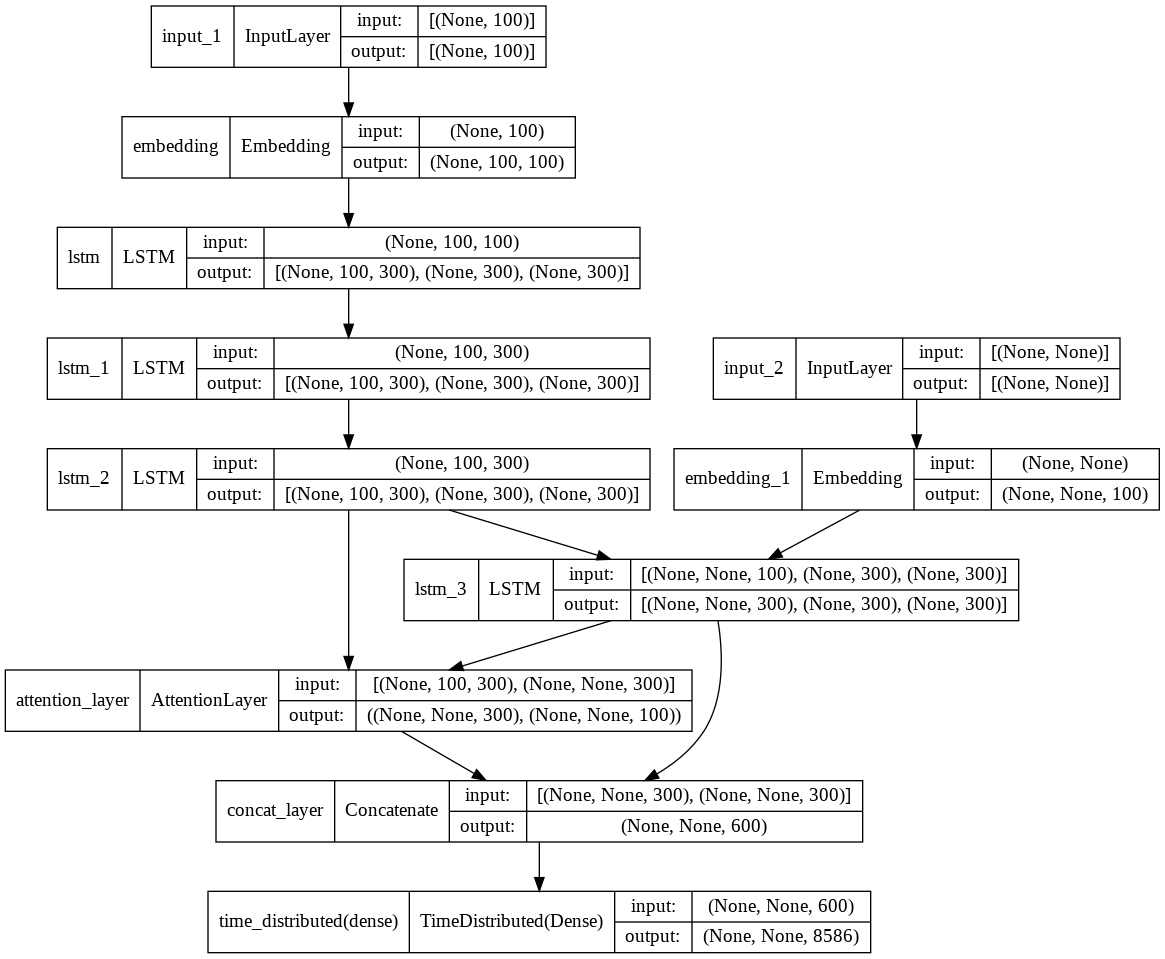

In [ ]:
#Visualize the Model
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Train model

In [ ]:
# history=model.fit(x_tr, y_tr,epochs=50,callbacks=[es],batch_size=128, validation_data=(x_val,y_val))

# history=model.fit([X_train_encoded,y_train_encoded[:,:]], y_train_encoded.reshape(y_train_encoded.shape[0],y_train_encoded.shape[1], 1)[:,1:] ,
#                   epochs=50,callbacks=[es],
#                   batch_size=256, 
#                   validation_data=([X_dev_encoded,y_dev_encoded[:,:]], y_dev_encoded.reshape(y_dev_encoded.shape[0],y_dev_encoded.shape[1], 1)[:,1:]))

history=model.fit([X_train_encoded_final,y_train_encoded_final[:,:-1]], y_train_encoded_final.reshape(y_train_encoded_final.shape[0],y_train_encoded_final.shape[1], 1)[:,1:] ,
                  epochs=10,
                  batch_size=256, 
                  validation_data=([X_dev_encoded_final,y_dev_encoded_final[:,:-1]], y_dev_encoded_final.reshape(y_dev_encoded_final.shape[0],y_dev_encoded_final.shape[1], 1)[:,1:]))

# history=model.fit([X_train_encoded,y_train_encoded[:,:-1]], y_train_encoded.reshape(y_train_encoded.shape[0],y_train_encoded.shape[1], 1)[:,1:] ,
#                   epochs=50,
#                   batch_size=256, 
#                   validation_data=([X_dev_encoded,y_dev_encoded[:,:-1]], y_dev_encoded.reshape(y_dev_encoded.shape[0],y_dev_encoded.shape[1], 1)[:,1:]))


Epoch 1/10
40/40 [==============================] - 84s 2s/step - loss: nan - val_loss: nan
Epoch 2/10
40/40 [==============================] - 73s 2s/step - loss: nan - val_loss: nan
Epoch 3/10
40/40 [==============================] - 75s 2s/step - loss: nan - val_loss: nan
Epoch 4/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan
Epoch 5/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan
Epoch 6/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan
Epoch 7/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan
Epoch 8/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan
Epoch 9/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan
Epoch 10/10
40/40 [==============================] - 74s 2s/step - loss: nan - val_loss: nan


##decode

In [ ]:
reverse_target_word_index=yword_tokenizer.index_word
reverse_source_word_index=word_tokenizer.index_word
target_word_index=yword_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(MAX_LEN,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


#Attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

#Adding Dense softmax layer to generate proability distribution over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(MAX_LEN,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
with open('/content/drive/MyDrive/nam3/course/nlp/encoder_50_model_w2v100dims_notattention.json', 'w', encoding='utf8') as f:
    f.write(encoder_model.to_json())
encoder_model.save_weights('/content/drive/MyDrive/nam3/course/nlp/encoder_model_50_seq2seq_vitokenizer_w2v100dims_notattention.h5')

with open('/content/drive/MyDrive/nam3/course/nlp/decoder_50_model_w2v100dims_notattention.json', 'w', encoding='utf8') as f:
    f.write(decoder_model.to_json())
decoder_model.save_weights('/content/drive/MyDrive/nam3/course/nlp/decoder_model_50_seq2seq_vitokenizer_w2v100dims_notattention.h5')

**We are defining a function below which is the implementation of the inference process**

In [ ]:
target_seq = np.zeros((1,1))
target_word_index['bắt']

155

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # print(sampled_token_index)
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (100-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

**Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:**


In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['bắt_đầu']) and i!=target_word_index['kết_thúc']):
            newString=newString+str(reverse_target_word_index[i])+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+str(reverse_source_word_index[i])+' '
    return newString

**Run the model over the data to see the results**

### predict

In [ ]:
!pip install rouge-score -qq

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
for i in range(0,10):
    # print("Review:",seq2text(X_test_encoded[i]))
    # print("Original summary:",seq2summary(y_test_encoded_final[i]))
    print("Predicted summary:",decode_sequence(X_train_encoded[i].reshape(1,100)))
    # scores = scorer.score(seq2summary(y_test_encoded_final[i]), decode_sequence(X_test_encoded_final[i].reshape(1,100)))
    # print(scores)
    print("\n")


Predicted summary:  một người đàn ông ở bang california bị bắn chết khi đang chạy trốn khỏi cảnh sát khiến một người chết và bị thương


Predicted summary:  tàu chiến mỹ hàn quốc hôm nay phóng thử tên lửa đạn đạo xuyên lục địa triều tiên trong bối cảnh căng thẳng với triều tiên


Predicted summary:  quân đội syria đã giành lại một cuộc tấn công vào các cuộc tấn công khủng bố ở syria nhằm vào các cuộc tấn công khủng bố ở phía bắc syria


Predicted summary:  các trận động viên trực tiếp giữa đội tuyển u23 việt nam và malaysia đã được huy động viên đặc biệt để đón trận thắng trận chung kết world cup 2018


Predicted summary:  bộ ngoại giao trung quốc hôm nay cho biết ông sẽ gửi bộ ngoại giao trung quốc kêu gọi các nước này và trung quốc bắt giữ tàu cá của ngư dân trung quốc


Predicted summary:  người phụ nữ ở trung quốc đã trở thành một trong những người phụ nữ trong cuộc sống với người việt nam và con gái này


Predicted summary:  đoạn video ghi lại khoảnh khắc của bạn gái người hâm mộ 

In [ ]:
set_test.summary[0:10]

0                                                                                Bộ_trưởng Quốc_phòng Anh vạch ra chiến_lược hậu Brexit , đề_cao phô_trương sức_mạnh quân_sự để bảo_vệ lợi_ích của London . 
1    Nhận kỷ_luật sau khi đi lễ trong giờ_hành_chính , Giám_đốc trung_tâm hỗ_trợ xuất_khẩu ( Cục Xúc_tiến thương_mại ) bị hạ bậc lương . Hội_đồng_kỷ_luật cũng cảnh_cáo 7 cán_bộ cấp phòng , khiển_trách ...
2           Theo quy_định của luật Khiếu_nại , các cơ_quan Nhà_nước có thẩm_quyền không được thụ_lý giải_quyết đối_với khiếu_nại đã có quyết_định giải_quyết lần 2 . Việc này thuộc thẩm_quyền của toà_án . 
3                                                                  Ngày mùng 3 Tết , phố Sách Hà_Nội mở_cửa và sẽ kéo_dài tới ngày mùng 10 tế và đây trở_thành một điểm đến của nhiều gia_đình đi du_xuân . 
4                                                                            Một cặp vợ_chồng tại thành_phố Hamburg , Đức đã lơ_đễnh quên mất đứa con vừa chào_đời của họ khi đi tax

In [ ]:
len(set_test.summary)

22644

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
df_predict_test = []
for i in range(len(set_test.summary)):
    # print("Review:",seq2text(X_test_encoded[i]))
    # print("Original summary:",seq2summary(y_test_encoded[i]))
    # print("Predicted summary:",decode_sequence(X_test_encoded[i].reshape(1,100)))
    df_predict_test.append(decode_sequence(X_test_encoded[i].reshape(1,100)))
    scores = scorer.score(set_test.summary[i], decode_sequence(X_test_encoded[i].reshape(1,100)))
    print(i)

In [ ]:
df_predict_test = pd.DataFrame(df_predict_test, columns = ['predict'])

In [ ]:
df_predict_test.to_csv('/content/drive/MyDrive/nam3/course/nlp/predict_full.csv', encoding='utf-8')

In [ ]:
from keras.models import model_from_json

# Load model and Predict

In [ ]:
from keras.models import model_from_json

In [ ]:
def load_model(model_filename, model_weights_filename):
    with open(model_filename, 'r', encoding='utf8') as f:
        model = model_from_json(f.read(), custom_objects={'AttentionLayer': AttentionLayer})
    model.load_weights(model_weights_filename)
    return model

encoder_model = load_model('/content/drive/MyDrive/nam3/course/nlp/encoder_50_model_w2v100dims.json', '/content/drive/MyDrive/nam3/course/nlp/encoder_model_50_seq2seq_vitokenizer_w2v100dims.h5')
decoder_model = load_model('/content/drive/MyDrive/nam3/course/nlp/decoder_50_model_w2v100dims.json', '/content/drive/MyDrive/nam3/course/nlp/decoder_model_50_seq2seq_vitokenizer_w2v100dims.h5')

In [ ]:
def load_model(model_filename, model_weights_filename):
    with open(model_filename, 'r', encoding='utf8') as f:
        model = model_from_json(f.read())
    model.load_weights(model_weights_filename)
    return model

encoder = load_model('/content/drive/MyDrive/nam3/course/nlp/encoder_50_model_w2v100dims_notattention.json', '/content/drive/MyDrive/nam3/course/nlp/encoder_model_50_seq2seq_vitokenizer_w2v100dims_notattention.h5')
decoder = load_model('/content/drive/MyDrive/nam3/course/nlp/decoder_50_model_w2v100dims_notattention.json', '/content/drive/MyDrive/nam3/course/nlp/decoder_model_50_seq2seq_vitokenizer_w2v100dims_notattention.h5')

load glove

In [ ]:
def load_model(model_filename, model_weights_filename):
    with open(model_filename, 'r', encoding='utf8') as f:
        model = model_from_json(f.read(), custom_objects={'AttentionLayer': AttentionLayer})
    model.load_weights(model_weights_filename)
    return model

encoder_model = load_model('/content/drive/MyDrive/nam3/course/nlp/Code Tổng Hợp Đồ Án/Glove /seqtoseq_with_attention_layer/encoder_50_model.json', '/content/drive/MyDrive/nam3/course/nlp/Code Tổng Hợp Đồ Án/Glove /seqtoseq_with_attention_layer/encoder_model_50_seq2seq_vitokenizer.h5')
decoder_model = load_model('/content/drive/MyDrive/nam3/course/nlp/Code Tổng Hợp Đồ Án/Glove /seqtoseq_with_attention_layer/decoder_50_model.json', '/content/drive/MyDrive/nam3/course/nlp/Code Tổng Hợp Đồ Án/Glove /seqtoseq_with_attention_layer/decoder_model_50_seq2seq_vitokenizer.h5')

In [ ]:
reverse_target_word_index=yword_tokenizer.index_word
reverse_source_word_index=word_tokenizer.index_word
target_word_index=yword_tokenizer.word_index

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (100-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
import numpy as np
from math import log
def decode_sequence_beam_search(input_seq,beam_width):
    # variable that save top options
    distributions_scores_states = [[list(), 0.0, [None, None]]]
    
    stop_condition = False

    while not stop_condition:
        sequence_temp_candidates = list()

        # get state to input next cell for each candidate
        for i in range (len(distributions_scores_states)):
          # Generate empty target sequence of length 1.
          target_seq = np.zeros((1,1))

          # get sequence, scores, states value of top options
          seq, score, states_values = distributions_scores_states[i]

          if len(distributions_scores_states)==1:
            # get state from encoder model
            e_out, e_h, e_c = encoder_model.predict(input_seq)

            # first sequence is 'sostok' to start a sequence
            target_seq[0, 0] = target_word_index['sostok']

          else:
             # get previous word and its state values
             target_seq[0,0]=seq[-1]
             e_h = states_values[0]
             e_c = states_values[1]
          
          # if previous word is 'eostok' that end of sentance, save that sentance in to sequence_temo_candidates
          if target_seq==target_word_index['eostok']:
            sequence_temp_candidates.append(distributions_scores_states[i])
          else: 
            # get output token, h, c
            output_tokens_distribution, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
            # update states
            states_values=[h,c]

            # get distribution of predicted word
            predicted_distribution=output_tokens_distribution[0,0]
            
            # calculate score and save candidate words 
            for j in range(len(predicted_distribution)):
              if predicted_distribution[j]>0:
                candidate = [seq + [j], score - log(predicted_distribution[j]), states_values]
                sequence_temp_candidates.append(candidate)

        # order candiate words
        ordered = sorted(sequence_temp_candidates, key=lambda tup:tup[1])
        # get n words
        distributions_scores_states = ordered[:beam_width]
        
        # check condition to stop searching
        stop_condition = True
        for i in range(beam_width):
          seq, score, states_values = distributions_scores_states[i]
          # print(len(seq))
          if (seq[-1]!=target_word_index['eostok']):
            stop_condition = False
          if len(seq) >= (100-1):
            stop_condition = True
            break

    # get result     
    seq, score, states_values = distributions_scores_states[0]
    result_sentance =''
    for token_index in seq:
      if token_index == target_word_index['eostok']:
          break
      word = reverse_target_word_index[token_index]
      result_sentance+=word + " "
    # print(result_sentance)
    return result_sentance

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+str(reverse_target_word_index[i])+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+str(reverse_source_word_index[i])+' '
    return newString

In [ ]:
!pip install -q rouge_score

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
for i in range(0,10):
    print("Review:",seq2text(X_test_encoded[i]))
    print("Original summary:",seq2summary(y_test_encoded[i]))
    print("Predicted summary:",decode_sequence(X_test_encoded[i].reshape(1,100)))
    scores = scorer.score(seq2summary(y_test_encoded[i]), decode_sequence(X_test_encoded[i].reshape(1,100)))
    print(scores)
    print("\n")

Review: kiến được trang bị hệ thống phóng và cáp hãm đà cho máy bay như lớp nimitz và gerald r ford của mỹ nhưng chi phí quá cao buộc hải quân anh lựa chọn giải pháp stovl và sử dụng tiêm kích f 35 b hms queen elizabeth có khả năng chở tối đa 36 máy bay f 35 b và 4 trực thăng cảnh báo sớm crowsnest nó có thể được bổ sung tới 12 trực thăng chinook hoặc merlin và 8 trực thăng tấn công ah 64 apache hms queen elizabeth thử nghiệm trên biển hồi năm 2018 
Original summary: bộ trưởng quốc phòng anh vạch ra chiến lược hậu brexit đề cao phô trương sức mạnh quân sự để bảo vệ lợi ích của london 
Predicted summary:  máy bay chở 130 000 lít dầu diesel bị hỏng do không quân mỹ đã bị thương trong khi một máy bay không người lái
{'rouge1': Score(precision=0.3888888888888889, recall=0.3684210526315789, fmeasure=0.37837837837837834), 'rouge2': Score(precision=0.08571428571428572, recall=0.08108108108108109, fmeasure=0.08333333333333334), 'rougeL': Score(precision=0.25, recall=0.23684210526315788, fmeasu

In [ ]:
list_pred = []
for i in range(8000,10000): 
    print("Predicted summary:", i)
    # list_pred.append(decode_sequence(X_test_encoded[i].reshape(1,100)))
    list_pred.append(decode_sequence_beam_search(X_test_encoded[i].reshape(1,100), 3))

Predicted summary: 8000
Predicted summary: 8001
Predicted summary: 8002
Predicted summary: 8003
Predicted summary: 8004
Predicted summary: 8005
Predicted summary: 8006
Predicted summary: 8007
Predicted summary: 8008
Predicted summary: 8009
Predicted summary: 8010
Predicted summary: 8011
Predicted summary: 8012
Predicted summary: 8013
Predicted summary: 8014
Predicted summary: 8015
Predicted summary: 8016
Predicted summary: 8017
Predicted summary: 8018
Predicted summary: 8019
Predicted summary: 8020
Predicted summary: 8021
Predicted summary: 8022
Predicted summary: 8023
Predicted summary: 8024
Predicted summary: 8025
Predicted summary: 8026
Predicted summary: 8027
Predicted summary: 8028
Predicted summary: 8029
Predicted summary: 8030
Predicted summary: 8031
Predicted summary: 8032
Predicted summary: 8033
Predicted summary: 8034
Predicted summary: 8035
Predicted summary: 8036
Predicted summary: 8037
Predicted summary: 8038
Predicted summary: 8039
Predicted summary: 8040
Predicted summar

In [ ]:
list_pred = []
for i in range(8000,10000): 
    print("Predicted summary:", i)
    # list_pred.append(decode_sequence(X_test_encoded[i].reshape(1,100)))
    list_pred.append(decode_sequence_beam_search(X_test_encoded[i].reshape(1,100), 3))
    if len(list_pred)%10 == 0:
      data = pd.DataFrame(list_pred, columns = ['Predict'])
      data.to_csv('/content/drive/MyDrive/nam3/course/nlp/Code Tổng Hợp Đồ Án/Glove /file predict/predict_w2v100dims_beam_8_10.csv', encoding='utf-8')


Predicted summary: 8000
Predicted summary: 8001
Predicted summary: 8002
Predicted summary: 8003
Predicted summary: 8004
Predicted summary: 8005
Predicted summary: 8006
Predicted summary: 8007
Predicted summary: 8008
Predicted summary: 8009
Predicted summary: 8010
Predicted summary: 8011
Predicted summary: 8012
Predicted summary: 8013
Predicted summary: 8014
Predicted summary: 8015
Predicted summary: 8016
Predicted summary: 8017
Predicted summary: 8018
Predicted summary: 8019
Predicted summary: 8020
Predicted summary: 8021
Predicted summary: 8022
Predicted summary: 8023
Predicted summary: 8024
Predicted summary: 8025
Predicted summary: 8026
Predicted summary: 8027
Predicted summary: 8028
Predicted summary: 8029
Predicted summary: 8030


In [ ]:
data_pred = pd.DataFrame(list_pred, columns = ['Predict'])

In [ ]:
len(data_pred)

2000

In [ ]:
bigdata = pd.concat([data_pred, set_test.summary], ignore_index=True, sort=False)

In [ ]:
bigdata

,Predict,0
0,một tiêm kích f 35 a của mỹ đã bị tiêu diệt trong khi chiếc máy bay không người lái của mỹ và mỹ bắn hạ một máy bay,NaN
1,ông nguyễn đức chung chủ tịch ubnd tỉnh quảng ninh đã quyết định kỷ luật cảnh cáo về hành động vi phạm quy định về hành vi vi phạm quy định về hành vi vi phạm quy định,NaN
2,sau khi nhận được thông tin về việc bổ sung tài sản của ông nguyễn hữu linh đã bị tố cáo buộc phải bồi thường cho các cá nhân liên quan đến vụ án,NaN
3,sáng 21 3 tại tp hcm đã tổ chức lễ hội pháo hoa quốc tế 2019 tại tp hcm và tp hcm đã được tổ chức tại tp hcm,NaN
4,chiếc taxi chở khách đi trên đường nguyễn văn trỗi quận gò vấp tp hcm đã va chạm với xe máy khiến nhiều người bị thương,NaN
...,...,...
45283,NaN,"Bộ_trưởng Bộ Công_an Tô_Lâm nhận_định TP. HCM đang bị tội_phạm biến thành nơi trung_chuyển ma_tuý do có rất nhiều sơ_hở trong quản_lý_nhà_nước , phải tháo_gỡ trong thời_gian tới ."
45284,NaN,Đây được xem là cuộc biểu_tình lớn nhất từ khi Hong_Kong được trao_trả cho Trung_Quốc nhằm phản_đối việc đưa tội_phạm tới đại_lục xét_xử .
45285,NaN,"Tổng_thống Mỹ Donald_Trump bình_luận rằng Trung_Quốc đã "" bóc_lột hàng tỉ đôla "" của Mỹ như "" lấy tiền của con_nít "" , tố cả chính_quyền các đời tổng_thống trước đều bị lừa ."
45286,NaN,Ba hoạ_sĩ trẻ có “ sự bùng_nổ trong sáng_tạo ” sẽ được lựa_chọn trở_thành những hoạ_sĩ Việt_Nam đầu_tiên tham_dự Hội_chợ nghệ_thuật ( Affordable_Art_Fair ) tại London tháng 5-2019 .


In [ ]:
data_pred.to_csv('/content/drive/MyDrive/nam3/course/nlp/predict_w2v100dims_8_10.csv', encoding='utf-8')

In [ ]:
!pip install rouge_score

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
list_score = []
for i in range(0,len(set_test)):
    scores = scorer.score(bigdata.iloc[:,0][i],bigdata.iloc[:,1][i] )
    list_score.append(scores)
    print(scores)

In [ ]:
list_score_r1 = []
list_score_r2 = []
list_score_rl = []
for i in range(10000):
  list_score_r1.append(list_score[i]['rouge1'].fmeasure)
  list_score_r2.append(list_score[i]['rouge2'].fmeasure)
  list_score_rl.append(list_score[i]['rougeL'].fmeasure)

In [ ]:
np.mean(list_score_r1)

0.46739412426691196

In [ ]:
np.mean(list_score_r2)

0.11364088531719214

In [ ]:
np.mean(list_score_rl)

0.27981682056699375

In [ ]:
data_pred = pd.read_csv('/content/predict_full.csv')
data_pred.head(5)

,Unnamed: 0,Predict
0,0,một tiêm kích f 35 a của mỹ đã bị tiêu diệt t...
1,1,ông nguyễn đức chung chủ tịch ubnd tỉnh quảng...
2,2,sau khi nhận được thông tin về việc bổ sung t...
3,3,sáng 21 3 tại tp hcm đã tổ chức lễ hội pháo h...
4,4,chiếc taxi chở khách đi trên đường nguyễn văn...


In [ ]:
set_test.iloc[:,1][1]

'Nhận kỷ_luật sau khi đi lễ trong giờ_hành_chính , Giám_đốc trung_tâm hỗ_trợ xuất_khẩu ( Cục Xúc_tiến thương_mại ) bị hạ bậc lương . Hội_đồng_kỷ_luật cũng cảnh_cáo 7 cán_bộ cấp phòng , khiển_trách 2 viên_chức . '

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
list_score = []
for i in range(0,len(set_test)):
    scores = scorer.score(data_pred.iloc[:,1][i],set_test.iloc[:,1][i] )
    list_score.append(scores)
    print(scores)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
{'rouge1': Score(precision=0.4090909090909091, recall=0.6, fmeasure=0.4864864864864865), 'rouge2': Score(precision=0.07692307692307693, recall=0.11363636363636363, fmeasure=0.09174311926605505), 'rougeL': Score(precision=0.21212121212121213, recall=0.3111111111111111, fmeasure=0.25225225225225223)}
{'rouge1': Score(precision=0.375, recall=0.4166666666666667, fmeasure=0.3947368421052631), 'rouge2': Score(precision=0.05128205128205128, recall=0.05714285714285714, fmeasure=0.05405405405405405), 'rougeL': Score(precision=0.225, recall=0.25, fmeasure=0.2368421052631579)}
{'rouge1': Score(precision=0.4489795918367347, recall=0.4782608695652174, fmeasure=0.46315789473684216), 'rouge2': Score(precision=0.1875, recall=0.2, fmeasure=0.19354838709677422), 'rougeL': Score(precision=0.30612244897959184, recall=0.32608695652173914, fmeasure=0.3157894736842105)}
{'rouge1': Score(precision=0.3956043956043956, recall=0.5294117647058824, fmeasure=

In [ ]:
list_score_r1 = []
list_score_r2 = []
list_score_rl = []
for i in range(len(set_test)):
  list_score_r1.append(list_score[i]['rouge1'].fmeasure)
  list_score_r2.append(list_score[i]['rouge2'].fmeasure)
  list_score_rl.append(list_score[i]['rougeL'].fmeasure)

In [ ]:
np.mean(list_score_r1)

0.4683713223489246

In [ ]:
np.mean(list_score_r2)

0.11435775415628803

In [ ]:
np.mean(list_score_rl)

0.280151845004623

In [ ]:
list_score_r1_pre = []
list_score_r2_pre = []
list_score_rl_pre = []
for i in range(len(set_test)):
  list_score_r1_pre.append(list_score[i]['rouge1'].precision)
  list_score_r2_pre.append(list_score[i]['rouge2'].precision)
  list_score_rl_pre.append(list_score[i]['rougeL'].precision)

In [ ]:
np.mean(list_score_r1_pre)

0.43200659285619114

In [ ]:
np.mean(list_score_r2_pre)

0.10511875833749815

In [ ]:
np.mean(list_score_rl_pre)

0.2586266782912943

In [ ]:
list_score_r1_recall = []
list_score_r2_recall = []
list_score_rl_recall = []
for i in range(len(set_test)):
  list_score_r1_recall.append(list_score[i]['rouge1'].recall)
  list_score_r2_recall.append(list_score[i]['rouge2'].recall)
  list_score_rl_recall.append(list_score[i]['rougeL'].recall)

In [ ]:
print(np.mean(list_score_r1_recall))
print(np.mean(list_score_r2_recall))
print(np.mean(list_score_rl_recall))

0.5420082146962527
0.1331715473517463
0.3247011593825895
